In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import Adam
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from scipy import interp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Flatten,Dense, Dropout
from sklearn.decomposition import MiniBatchSparsePCA
import random

direc = "C:/Users/chsue/Documents/MITyear3/6.047/GDACLAMLmethyl450/data/"
GSE41169controlcols = ['"GSM1009' + x +'"' for x in ["666","667","668","673","674","677","681","685","686","687","688","689","690","691","692","693","694","695","697","723",
                       "727","729","739","742","743","744","745","746","747","748","749","892","893"]]

GSE63499controlcols = ['"GSM1551' + x +'"' for x in ["110","114","118","122","126","132","136","140","144","148","152","156"]]

GSE64495controlcols = ['"GSM157250' + str(x) +'"' for x in range(3,10)] + ['"GSM15725' + str(x) +'"' for x in range(10,65)]

GSE64934cols = ['"GSM1584043"','"GSM1584044"','"GSM1584045"','"GSM1584046"','"GSM1584047"','"GSM1584048"']
# first three are some FLT3 ITD and then the last three are WT

In [36]:
trainingNames = ['TCGA-AB-2861-03A-01D-0741-05',
 'TCGA-AB-2846-03A-01D-0741-05',
 'TCGA-AB-2930-03A-01D-0743-05',
 '"GSM1572554"',
 '"GSM1009666"',
 'GSM1280946',
 '"GSM1572531"',
 'GSM1281007',
 '"GSM1009685"',
 'TCGA-AB-2857-03A-01D-0741-05',
 '"GSM1572513"',
 '"GSM1572508"',
 'GSM1280952',
 '"GSM1572543"',
 '"GSM1572506"',
 'TCGA-AB-2968-03A-01D-0741-05',
 '"GSM1009748"',
 '"GSM1009677"',
 'TCGA-AB-2875-03A-01D-0742-05',
 'TCGA-AB-2943-03A-01D-0743-05',
 '"GSM1572528"',
 'TCGA-AB-2931-03A-01D-0743-05',
 '"GSM1572550"',
 '"GSM1572519"',
 '"GSM1009668"',
 'TCGA-AB-3002-03A-01D-0742-05',
 'TCGA-AB-2992-03A-01D-0741-05',
 'TCGA-AB-2917-03A-01D-0741-05',
 '"GSM1572558"',
 'TCGA-AB-2845-03A-01D-0741-05',
 'GSM1280997',
 'TCGA-AB-2835-03A-01D-0741-05',
 'GSM1280991',
 'TCGA-AB-2804-03A-01D-0741-05',
 '10A',
 '"GSM1572545"',
 'TCGA-AB-2946-03A-01D-0743-05',
 '"GSM1551152"',
 'TCGA-AB-2891-03A-01D-0742-05',
 'TCGA-AB-2851-03A-01D-0741-05',
 'TCGA-AB-2887-03A-01D-0742-05',
 '"GSM1572538"',
 '"GSM1572563"',
 'TCGA-AB-2811-03A-01D-0741-05',
 'GSM1280957',
 '"GSM1572529"',
 'GSM1281021',
 'GSM1281012',
 'TCGA-AB-2892-03A-01D-0742-05',
 '"GSM1009687"',
 'TCGA-AB-2860-03A-01D-0741-05',
 'TCGA-AB-2890-03A-01D-0742-05',
 'TCGA-AB-2834-03A-01D-0741-05',
 'TCGA-AB-2912-03A-01D-0741-05',
 'TCGA-AB-2814-03A-01D-0741-05',
 'TCGA-AB-2823-03A-01D-0741-05',
 'TCGA-AB-2919-03A-01D-0743-05',
 'TCGA-AB-2990-03A-01D-0742-05',
 'TCGA-AB-2884-03A-01D-0742-05',
 '"GSM1572535"',
 '"GSM1009729"',
 'TCGA-AB-2876-03A-01D-0742-05',
 'TCGA-AB-2829-03A-01D-0741-05',
 'GSM1281005',
 'TCGA-AB-2996-03A-01D-0741-05',
 '"GSM1551118"',
 'TCGA-AB-2971-03A-01D-0741-05',
 'TCGA-AB-2882-03A-01D-0742-05',
 'TCGA-AB-2944-03A-01D-0743-05',
 'GSM1280960',
 'TCGA-AB-2915-03A-01D-0743-05',
 'TCGA-AB-2936-03A-01D-0743-05',
 'TCGA-AB-2896-03A-01D-0742-05',
 'GSM1280953',
 'TCGA-AB-3005-03A-01D-0741-05',
 '"GSM1572533"',
 '"GSM1572553"',
 'TCGA-AB-2918-03A-01D-0743-05',
 'TCGA-AB-2833-03A-01D-0741-05',
 'GSM1280951',
 '"GSM1572539"',
 'GSM1280947',
 '"GSM1572515"',
 '3',
 '"GSM1572561"',
 'GSM1280944',
 'GSM1280962',
 '"GSM1572524"',
 'TCGA-AB-2933-03A-01D-0742-05',
 'TCGA-AB-3012-03A-01D-0741-05',
 'TCGA-AB-2817-03A-01D-0742-05',
 'TCGA-AB-2940-03A-01D-0742-05',
 'TCGA-AB-2897-03A-01D-0742-05',
 'TCGA-AB-2873-03A-01D-0742-05',
 'GSM1281018',
 'TCGA-AB-2955-03A-01D-0742-05',
 'TCGA-AB-2904-03A-01D-0741-05',
 'TCGA-AB-2963-03A-01D-0741-05',
 '"GSM1009745"',
 'TCGA-AB-2947-03A-01D-0743-05',
 'GSM1280994',
 'TCGA-AB-2972-03A-01D-0741-05',
 '1B',
 'TCGA-AB-2993-03A-01D-0741-05',
 'TCGA-AB-2998-03A-01D-0742-05',
 'GSM1280938',
 'TCGA-AB-2987-03A-01D-0742-05',
 'TCGA-AB-2964-03A-01D-0741-05',
 '195',
 '"GSM1551114"',
 'GSM1280995',
 '"GSM1009693"',
 'GSM1281000',
 '"GSM1009674"',
 '"GSM1572552"',
 '13',
 'TCGA-AB-2893-03A-01D-0742-05',
 'TCGA-AB-2989-03A-01D-0742-05',
 'TCGA-AB-2923-03A-01D-0743-05',
 'TCGA-AB-2929-03A-01D-0741-05',
 'GSM1280941',
 'TCGA-AB-2869-03A-01D-0742-05',
 '"GSM1572516"',
 'TCGA-AB-2973-03A-01D-0742-05',
 '"GSM1009695"',
 'TCGA-AB-2802-03A-01D-0741-05',
 '"GSM1009667"',
 'GSM1281006',
 'TCGA-AB-2886-03A-01D-0742-05',
 'TCGA-AB-2866-03A-01D-0741-05',
 '"GSM1572520"',
 '"GSM1572534"',
 'TCGA-AB-2867-03A-01D-0741-05',
 'TCGA-AB-2828-03A-01D-0741-05',
 '"GSM1009697"',
 'TCGA-AB-2986-03A-01D-0742-05',
 'GSM1281002',
 'TCGA-AB-2924-03A-01D-0743-05',
 'TCGA-AB-2874-03A-01D-0742-05',
 'GSM1281010',
 'TCGA-AB-2888-03A-01D-0742-05',
 'TCGA-AB-2810-03A-01D-0741-05',
 'GSM1280993',
 'TCGA-AB-2871-03A-01D-0742-05',
 '"GSM1572511"',
 'GSM1280948',
 'TCGA-AB-2925-03A-01D-0741-05',
 '181',
 '"GSM1572518"',
 'TCGA-AB-2913-03A-01D-0741-05',
 'TCGA-AB-2985-03A-01D-0742-05',
 'TCGA-AB-2883-03A-01D-0742-05',
 '"GSM1009893"',
 'TCGA-AB-2934-03A-01D-0743-05',
 'TCGA-AB-2837-03A-01D-0741-05',
 'TCGA-AB-2844-03A-01D-0741-05',
 'TCGA-AB-2907-03A-01D-0742-05',
 'TCGA-AB-2895-03A-01D-0742-05',
 'TCGA-AB-2878-03A-01D-0742-05',
 'TCGA-AB-2999-03A-01D-0742-05',
 'GSM1280955',
 '11B',
 '"GSM1551110"',
 'TCGA-AB-2898-03A-01D-0742-05',
 'TCGA-AB-2881-03A-01D-0742-05',
 'GSM1280954',
 '308',
 '"GSM1572503"',
 '239',
 'TCGA-AB-3007-03A-01D-0741-05',
 'TCGA-AB-3001-03A-01D-0741-05',
 'TCGA-AB-2945-03A-01D-0741-05',
 'TCGA-AB-2842-03A-01D-0741-05',
 'GSM1280950',
 '"GSM1572517"',
 'TCGA-AB-2822-03A-01D-0741-05',
 '"GSM1572514"',
 'TCGA-AB-2949-03A-01D-0742-05',
 'TCGA-AB-2843-03A-01D-0741-05',
 'TCGA-AB-2941-03A-01D-0743-05',
 'TCGA-AB-2894-03A-01D-0742-05',
 'TCGA-AB-2997-03A-01D-0742-05',
 '"GSM1009691"',
 '3B',
 '"GSM1572527"',
 'TCGA-AB-2908-03A-01D-0743-05',
 '"GSM1572510"',
 'TCGA-AB-2848-03A-01D-0741-05',
 'TCGA-AB-2862-03A-01D-0741-05',
 '"GSM1572549"',
 'TCGA-AB-2847-03A-01D-0741-05',
 '"GSM1572541"',
 '"GSM1551126"',
 'TCGA-AB-2820-03A-01D-0741-05',
 '"GSM1551122"',
 '200',
 '2',
 '"GSM1572551"',
 'TCGA-AB-2950-03A-01D-0742-05',
 'GSM1280939',
 'TCGA-AB-2966-03A-01D-0741-05',
 'GSM1281017',
 '"GSM1551136"',
 '19',
 'GSM1281001',
 '"GSM1009892"',
 'TCGA-AB-2920-03A-01D-0742-05',
 'GSM1280998',
 '"GSM1572547"',
 'TCGA-AB-2853-03A-01D-0741-05',
 'TCGA-AB-2977-03A-01D-0742-05',
 'TCGA-AB-2885-03A-01D-0742-05',
 '"GSM1572504"',
 '"GSM1009689"',
 'GSM1280961',
 'TCGA-AB-2838-03A-01D-0741-05',
 'GSM1280999',
 '"GSM1572564"',
 'GSM1281014',
 'TCGA-AB-2921-03A-01D-0743-05',
 'TCGA-AB-2942-03A-01D-0742-05',
 '"GSM1572560"',
 'TCGA-AB-3000-03A-01D-0741-05',
 '"GSM1009744"',
 'GSM1280943',
 'TCGA-AB-2877-03A-01D-0742-05',
 'TCGA-AB-2855-03A-01D-0741-05',
 '"GSM1009690"',
 '"GSM1572512"',
 'TCGA-AB-2806-03A-01D-0741-05',
 'TCGA-AB-2840-03A-01D-0741-05',
 'TCGA-AB-2826-03A-01D-0741-05',
 'GSM1280942',
 '"GSM1551156"',
 'TCGA-AB-2965-03A-01D-0741-05',
 'TCGA-AB-2836-03A-01D-0741-05',
 '"GSM1009688"',
 'GSM1281019',
 'GSM1280963',
 '12',
 'TCGA-AB-2981-03A-01D-0742-05',
 '"GSM1572555"',
 'TCGA-AB-2969-03A-01D-0741-05',
 'TCGA-AB-2980-03A-01D-0742-05',
 '"GSM1009694"',
 'TCGA-AB-2959-03A-01D-0741-05',
 'TCGA-AB-2824-03A-01D-0741-05',
 'TCGA-AB-2916-03A-01D-0742-05',
 'TCGA-AB-2868-03A-01D-0741-05',
 'GSM1281004',
 'TCGA-AB-2911-03A-01D-0741-05',
 '"GSM1572556"',
 'TCGA-AB-2805-03A-01D-0741-05',
 '10',
 'TCGA-AB-2901-03A-01D-0742-05',
 '"GSM1572526"',
 'TCGA-AB-3009-03A-01D-0741-05',
 '"GSM1572548"',
 'TCGA-AB-2839-03A-01D-0741-05',
 'TCGA-AB-2854-03A-01D-0741-05',
 'TCGA-AB-2938-03A-01D-0741-05',
 'GSM1281009',
 'TCGA-AB-2808-03A-01D-0741-05',
 'TCGA-AB-2991-03A-01D-0741-05',
 '"GSM1572509"',
 '"GSM1572525"',
 'TCGA-AB-2812-03A-01D-0741-05',
 '"GSM1572557"',
 'GSM1280996',
 'TCGA-AB-2956-03A-01D-0741-05',
 'TCGA-AB-2935-03A-01D-0743-05',
 'GSM1280956',
 '"GSM1572544"',
 'TCGA-AB-2872-03A-01D-0742-05',
 'TCGA-AB-2821-03A-01D-0741-05',
 'TCGA-AB-2880-03A-01D-0742-05',
 '"GSM1572523"',
 'TCGA-AB-2816-03A-01D-0742-05',
 '"GSM1009723"',
 'TCGA-AB-2926-03A-01D-0742-05',
 'GSM1280949',
 'TCGA-AB-2813-03A-01D-0741-05',
 'TCGA-AB-3006-03A-01D-0741-05',
 'TCGA-AB-2928-03A-01D-0743-05',
 'TCGA-AB-2841-03A-01D-0741-05',
 '"GSM1572507"',
 '"GSM1572546"',
 '2A',
 '"GSM1572522"',
 'TCGA-AB-2900-03A-01D-0742-05',
 '"GSM1009742"',
 'TCGA-AB-2974-03A-01D-0742-05',
 'TCGA-AB-2910-03A-01D-0743-05',
 '"GSM1572521"',
 'GSM1280959',
 '"GSM1572505"',
 'TCGA-AB-2927-03A-01D-0743-05',
 'TCGA-AB-2858-03A-01D-0741-05',
 '310',
 '"GSM1572542"',
 'TCGA-AB-2825-03A-01D-0741-05',
 'TCGA-AB-2818-03A-01D-0741-05',
 'TCGA-AB-2982-03A-01D-0742-05',
 'TCGA-AB-2922-03A-01D-0743-05',
 '"GSM1009739"']
trainingIndices = [sampleNames.index(name) for name in trainingNames]
testIndices = list(set(range(382)) - set(trainingIndices))

In [19]:
# ---------------- DATA (PANDAS) PROCESSING -------------------------------- #
def process_cancer(chunk):
    cg = chunk["Hybridization REF"]
    chunk = chunk[chunk.columns[1::4]]  # isolate beta values for each participant
    chunk["Hybridization REF"] = cg
    chunk = chunk.set_index("Hybridization REF")
    if "Composite Element REF" in chunk.index:
        chunk = chunk.drop("Composite Element REF", axis=0)
    return chunk.apply(pd.to_numeric).round()

def process_control_1(chunk):
    # for control, isolate the control samples.
    controlCG = chunk["ID_REF"]
    controlCols = ["1B","2A","3B","3","5","13","19","10","12","14","2","239","200","181","195","308","310","8B","10A","11B"]
    control = chunk[controlCols]
    control["ID_REF"] = controlCG
    return control.set_index("ID_REF").round()

def process_control_2(chunk, controlColNames):
    chunk['"ID_REF"'] = [i[1:len(i) - 1] for i in chunk['"ID_REF"']]
    controlCG = chunk['"ID_REF"']
    control = chunk[controlColNames]
    control["ID_REF"] = controlCG
    return control.set_index("ID_REF").apply(pd.to_numeric).round()

def process_control_3(chunk):
    controlCG = chunk["ID_REF"]
    controlCols = ["GSM1280" + str(937+x) for x in range(0,27)]+["GSM1280" + str(991+x) for x in range(0,9)] + ["GSM128" + str(1000+x) for x in range(0,25)]
    control = chunk[controlCols]
    control["ID_REF"] = controlCG
    return control.set_index("ID_REF").round()

def importCancer(cpgInd):
    listRows = []
    listCpGNames = []
    for i,chunk in enumerate(pd.read_table(direc+"LAMLmethyl450.txt", chunksize=4500)):
        print("Cancer ",i)
        chunk = process_cancer(chunk)
        targetIndices = set(cpgInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    cancerRows = pd.concat(listRows,names=listCpGNames)
    cancerRows = cancerRows.transpose()
    cancerRows = pd.concat([cancerRows,pd.DataFrame([1] * cancerRows.shape[0],columns=["Cancer"],index=cancerRows.index)],axis=1)
    cancerRows = pd.concat([cancerRows,pd.DataFrame([0] * cancerRows.shape[0],columns=["Not Cancer"],index=cancerRows.index)],axis=1)
    return cancerRows

def importControl1(cpgInd): ## Crohn's control
#     controlRows = pd.DataFrame()
    listRows = []
    listCpGNames = []
    for i,chunk in enumerate(pd.read_table(direc+"GSE32148_matrix_processed_peripheralBlood.txt",chunksize=4500,delimiter=r"\t+")):
        print("Control 1 ", i)
        chunk = process_control_1(chunk)
        targetIndices = set(cpgInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    controlRows = controlRows.transpose()
    controlRows = pd.concat([controlRows,pd.DataFrame([0] * controlRows.shape[0],columns=["Cancer"],index=controlRows.index)],axis=1)
    controlRows = pd.concat([controlRows,pd.DataFrame([1] * controlRows.shape[0],columns=["Not Cancer"],index=controlRows.index)],axis=1)
    return controlRows

def importControl2(cpgQuoteInd): # dutch study
    listRows = []
    listCpGNames = []    
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE41169_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print("Control 2", i)
        chunk = process_control_2(chunk, GSE41169controlcols)
        targetIndices = set(cpgQuoteInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    controlRows = controlRows.transpose()
    controlRows = pd.concat([controlRows,pd.DataFrame([0] * controlRows.shape[0],columns=["Cancer"],index=controlRows.index)],axis=1)
    controlRows = pd.concat([controlRows,pd.DataFrame([1] * controlRows.shape[0],columns=["Not Cancer"],index=controlRows.index)],axis=1)
    return controlRows

def importControl3(cpgInd): # smoker study
    listRows = []
    listCpGNames = []
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE53045_matrix_processed_GEO.txt", chunksize=4500, delimiter=r"\t+")):
        print("Control 3 ", i)
        chunk = process_control_3(chunk)
        targetIndices = set(cpgInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    controlRows = controlRows.transpose()
    controlRows = pd.concat([controlRows,pd.DataFrame([0] * controlRows.shape[0],columns=["Cancer"],index=controlRows.index)],axis=1)
    controlRows = pd.concat([controlRows,pd.DataFrame([1] * controlRows.shape[0],columns=["Not Cancer"],index=controlRows.index)],axis=1)
    return controlRows

def importControl4(cpgQuoteInd): # folic acid study
    listRows = []
    listCpGNames = []
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE63499_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print("Control 4 ", i)
        chunk = process_control_2(chunk, GSE63499controlcols)
        targetIndices = set(cpgQuoteInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    controlRows = controlRows.transpose()
    controlRows = pd.concat([controlRows,pd.DataFrame([0] * controlRows.shape[0],columns=["Cancer"],index=controlRows.index)],axis=1)
    controlRows = pd.concat([controlRows,pd.DataFrame([1] * controlRows.shape[0],columns=["Not Cancer"],index=controlRows.index)],axis=1)
    return controlRows

def importControl5(cpgQuoteInd): # developmental study
    listRows = []
    listCpGNames = []
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE64495_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print("Control 5 ", i)
        chunk = process_control_2(chunk, GSE64495controlcols)
        targetIndices = set(cpgQuoteInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    controlRows = controlRows.transpose()
    controlRows = pd.concat([controlRows,pd.DataFrame([0] * controlRows.shape[0],columns=["Cancer"],index=controlRows.index)],axis=1)
    controlRows = pd.concat([controlRows,pd.DataFrame([1] * controlRows.shape[0],columns=["Not Cancer"],index=controlRows.index)],axis=1)
    return controlRows

def importTestCancer(cpgQuoteInd):
    listRows = []
    listCpGNames = []
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE64934_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print("Test cancer ", i)
        chunk = process_control_2(chunk, GSE64934cols)
        targetIndices = set(cpgQuoteInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    return controlRows.transpose()

def importTestControl(cpgQuoteInd):
    listRows = []
    listCpGNames = []
    for i, chunk in enumerate(
            pd.read_table(direc + "GSE52588_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print("Test control ", i)
        chunk = process_control_2(chunk, list(chunk.columns)[1:])
        targetIndices = set(cpgQuoteInd).intersection(set(chunk.index))
        listCpGNames.append(list(targetIndices))
        listRows.append(chunk.loc[targetIndices])
    controlRows = pd.concat(listRows,names=listCpGNames)
    return controlRows.transpose()

def importData(cpgInd, cpgQuoteInd):
    control1 = importControl1(cpgInd)
    control2 = importControl2(cpgInd)
    control3 = importControl3(cpgQuoteInd)
    control4 = importControl4(cpgQuoteInd)
    control5 = importControl5(cpgQuoteInd)
    cancer = importCancer(cpgInd)
    total_data = control1.append(control2).append(control3).append(control4).append(control5).append(cancer)
    print(total_data)
    y = total_data[["Cancer","Not Cancer"]].values
    X = total_data.drop(["Cancer","Not Cancer"],axis=1)
    return X,y, list(total_data.index)

def create_nn_model(input_length):
    m = Sequential()
    m.add(Dense(units=1024, activation="relu",input_shape=(input_length,)))
    m.add(Dense(units=512, activation="relu"))
    m.add(Dense(units=512, activation="relu"))
    m.add(Dense(units=2, activation="softmax"))
    m.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=["accuracy"])
    return m

def create_svm():
    clf = SVC(gamma='auto', probability=True)
    return clf
    
def resetCpGSites(iter=0, sampleNames=None):
    f = open("SignificantCpG_Variances", 'r')
    if sampleNames is not None:
        f.close()
        significantSites(iter,sampleSites=sampleNames)
        f = open("SignificantCpG_Variances_iter"+str(iter),'r')
    cpgSites = f.read()
    cpgSites = cpgSites.split("\n")
    cpgIndices = pd.Index(cpgSites[:-1])
    cpgQuoteIndices = pd.Index([cpg for cpg in cpgSites[:-1]])
    return cpgIndices, cpgQuoteIndices

# --------- calculate the variances between cancer/control for CpG island beta values -------- #
def identify_significant_cpgSites(sampleNames=None):
    cpgSites = pd.Index([])
    count = 0
    for chunk1, chunk2,chunk3, chunk4, chunk5, chunk6 in zip(pd.read_table(direc+"LAMLmethyl450.txt", chunksize=4500),
                                           pd.read_table(direc+"GSE32148_matrix_processed_peripheralBlood.txt",chunksize=4500,delimiter=r"\t+"),
                                                           pd.read_table(direc + "GSE41169_series_matrix.txt", chunksize=4500, delimiter=r"\t+"),
                                                           pd.read_table(direc + "GSE53045_matrix_processed_GEO.txt", chunksize=4500, delimiter=r"\t+"),
                                                           pd.read_table(direc + "GSE63499_series_matrix.txt", chunksize=4500, delimiter=r"\t+"),
                                                           pd.read_table(direc + "GSE64495_series_matrix.txt", chunksize=4500, delimiter=r"\t+")):
        print(count)
        cancer_chunk, control_chunk_1,control_chunk_2,control_chunk_3,control_chunk_4,control_chunk_5 = process_cancer(chunk1), \
                                                                                                        process_control_1(chunk2),\
                                                                                                        process_control_2(chunk3,GSE41169controlcols), \
                                                                                                        process_control_3(chunk4), \
                                                                                                        process_control_2(chunk5,GSE63499controlcols), \
                                                                                                        process_control_2(chunk6, GSE64495controlcols)
        if sampleNames is not None:
            cancer_chunk = cancer_chunk[list(set(sampleNames) & set(list(cancer_chunk)))]
            control_chunk_1 = control_chunk_1[list(set(sampleNames) & set(list(control_chunk_1)))]
            control_chunk_2 = control_chunk_2[list(set(sampleNames) & set(list(control_chunk_2)))]
            control_chunk_3 = control_chunk_3[list(set(sampleNames) & set(list(control_chunk_3)))]
            control_chunk_4 = control_chunk_4[list(set(sampleNames) & set(list(control_chunk_4)))]
            control_chunk_5 = control_chunk_5[list(set(sampleNames) & set(list(control_chunk_5)))]
        total_chunk = pd.concat([cancer_chunk,control_chunk_1,control_chunk_2,control_chunk_3,control_chunk_4,control_chunk_5],axis=1).dropna()
        variances = total_chunk.var(axis=1)
        diffIndices = variances.nlargest(100).index

        cpgSites = cpgSites.union(diffIndices)
        count += 1
    return cpgSites

In [45]:
data,labels,sampleNames = importData(cpgIndices,cpgQuoteIndices)
i = 0

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 1  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 1  1
Control 1  2
Control 1  3
Control 1  4
Control 1  5
Control 1  6
Control 1  7
Control 1  8
Control 1  9
Control 1  10
Control 1  11
Control 1  12
Control 1  13
Control 1  14
Control 1  15
Control 1  16
Control 1  17
Control 1  18
Control 1  19
Control 1  20
Control 1  21
Control 1  22
Control 1  23
Control 1  24
Control 1  25
Control 1  26
Control 1  27
Control 1  28
Control 1  29
Control 1  30
Control 1  31
Control 1  32
Control 1  33
Control 1  34
Control 1  35
Control 1  36
Control 1  37
Control 1  38
Control 1  39
Control 1  40
Control 1  41
Control 1  42
Control 1  43
Control 1  44
Control 1  45
Control 1  46
Control 1  47
Control 1  48
Control 1  49
Control 1  50
Control 1  51
Control 1  52
Control 1  53
Control 1  54
Control 1  55
Control 1  56
Control 1  57
Control 1  58
Control 1  59
Control 1  60
Control 1  61
Control 1  62
Control 1  63
Control 1  64
Control 1  65
Control 1  66
Control 1  67
Control 1  68
Control 1  69
Control 1  70
Control 1  71
Control 1  72
C

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 2 0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 2 1
Control 2 2
Control 2 3
Control 2 4
Control 2 5
Control 2 6
Control 2 7
Control 2 8
Control 2 9
Control 2 10
Control 2 11
Control 2 12
Control 2 13
Control 2 14
Control 2 15
Control 2 16
Control 2 17
Control 2 18
Control 2 19
Control 2 20
Control 2 21
Control 2 22
Control 2 23
Control 2 24
Control 2 25
Control 2 26
Control 2 27
Control 2 28
Control 2 29
Control 2 30
Control 2 31
Control 2 32
Control 2 33
Control 2 34
Control 2 35
Control 2 36
Control 2 37
Control 2 38
Control 2 39
Control 2 40
Control 2 41
Control 2 42
Control 2 43
Control 2 44
Control 2 45
Control 2 46
Control 2 47
Control 2 48
Control 2 49
Control 2 50
Control 2 51
Control 2 52
Control 2 53
Control 2 54
Control 2 55
Control 2 56
Control 2 57
Control 2 58
Control 2 59
Control 2 60
Control 2 61
Control 2 62
Control 2 63
Control 2 64
Control 2 65
Control 2 66
Control 2 67
Control 2 68
Control 2 69
Control 2 70
Control 2 71
Control 2 72
Control 2 73
Control 2 74
Control 2 75
Control 2 76
Control 2 77
Control 

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 3  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 3  1
Control 3  2
Control 3  3
Control 3  4
Control 3  5
Control 3  6
Control 3  7
Control 3  8
Control 3  9
Control 3  10
Control 3  11
Control 3  12
Control 3  13
Control 3  14
Control 3  15
Control 3  16
Control 3  17
Control 3  18
Control 3  19
Control 3  20
Control 3  21
Control 3  22
Control 3  23
Control 3  24
Control 3  25
Control 3  26
Control 3  27
Control 3  28
Control 3  29
Control 3  30
Control 3  31
Control 3  32
Control 3  33
Control 3  34
Control 3  35
Control 3  36
Control 3  37
Control 3  38
Control 3  39
Control 3  40
Control 3  41
Control 3  42
Control 3  43
Control 3  44
Control 3  45
Control 3  46
Control 3  47
Control 3  48
Control 3  49
Control 3  50
Control 3  51
Control 3  52
Control 3  53
Control 3  54
Control 3  55
Control 3  56
Control 3  57
Control 3  58
Control 3  59
Control 3  60
Control 3  61
Control 3  62
Control 3  63
Control 3  64
Control 3  65
Control 3  66
Control 3  67
Control 3  68
Control 3  69
Control 3  70
Control 3  71
Control 3  72
C

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:100: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 4  0
Control 4  1
Control 4  2
Control 4  3
Control 4  4
Control 4  5
Control 4  6
Control 4  7
Control 4  8
Control 4  9
Control 4  10
Control 4  11
Control 4  12
Control 4  13
Control 4  14
Control 4  15
Control 4  16
Control 4  17
Control 4  18
Control 4  19
Control 4  20
Control 4  21
Control 4  22
Control 4  23
Control 4  24
Control 4  25
Control 4  26
Control 4  27
Control 4  28
Control 4  29
Control 4  30
Control 4  31
Control 4  32
Control 4  33
Control 4  34
Control 4  35
Control 4  36
Control 4  37
Control 4  38
Control 4  39
Control 4  40
Control 4  41
Control 4  42
Control 4  43
Control 4  44
Control 4  45
Control 4  46
Control 4  47
Control 4  48
Control 4  49
Control 4  50
Control 4  51
Control 4  52
Control 4  53
Control 4  54
Control 4  55
Control 4  56
Control 4  57
Control 4  58
Control 4  59
Control 4  60
Control 4  61
Control 4  62
Control 4  63
Control 4  64
Control 4  65
Control 4  66
Control 4  67
Control 4  68
Control 4  69
Control 4  70
Control 4  71
Co

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:116: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 5  0
Control 5  1
Control 5  2
Control 5  3
Control 5  4
Control 5  5
Control 5  6
Control 5  7
Control 5  8
Control 5  9
Control 5  10
Control 5  11
Control 5  12
Control 5  13
Control 5  14
Control 5  15
Control 5  16
Control 5  17
Control 5  18
Control 5  19
Control 5  20
Control 5  21
Control 5  22
Control 5  23
Control 5  24
Control 5  25
Control 5  26
Control 5  27
Control 5  28
Control 5  29
Control 5  30
Control 5  31
Control 5  32
Control 5  33
Control 5  34
Control 5  35
Control 5  36
Control 5  37
Control 5  38
Control 5  39
Control 5  40
Control 5  41
Control 5  42
Control 5  43
Control 5  44
Control 5  45
Control 5  46
Control 5  47
Control 5  48
Control 5  49
Control 5  50
Control 5  51
Control 5  52
Control 5  53
Control 5  54
Control 5  55
Control 5  56
Control 5  57
Control 5  58
Control 5  59
Control 5  60
Control 5  61
Control 5  62
Control 5  63
Control 5  64
Control 5  65
Control 5  66
Control 5  67
Control 5  68
Control 5  69
Control 5  70
Control 5  71
Co

C:\Users\chsue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40,41,44,45,48,49,52,53,56,57,60,61,64,65,68,69,72,73,76,77,80,81,84,85,88,89,92,93,96,97,100,101,104,105,108,109,112,113,116,117,120,121,124,125,128,129,132,133,136,137,140,141,144,145,148,149,152,153,156,157,160,161,164,165,168,169,172,173,176,177,180,181,184,185,188,189,192,193,196,197,200,201,204,205,208,209,212,213,216,217,220,221,224,225,228,229,232,233,236,237,240,241,244,245,248,249,252,253,256,257,260,261,264,265,268,269,272,273,276,277,280,281,284,285,288,289,292,293,296,297,300,301,304,305,308,309,312,313,316,317,320,321,324,325,328,329,332,333,336,337,340,341,344,345,348,349,352,353,356,357,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,440,441,444,445,448,449,452,453,456,457,460,461,464,465,468,469,472,473,4

Cancer  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Cancer  1
Cancer  2
Cancer  3
Cancer  4
Cancer  5
Cancer  6
Cancer  7
Cancer  8
Cancer  9
Cancer  10
Cancer  11
Cancer  12
Cancer  13
Cancer  14
Cancer  15
Cancer  16
Cancer  17
Cancer  18
Cancer  19
Cancer  20
Cancer  21
Cancer  22
Cancer  23
Cancer  24
Cancer  25
Cancer  26
Cancer  27
Cancer  28
Cancer  29
Cancer  30
Cancer  31
Cancer  32
Cancer  33
Cancer  34
Cancer  35
Cancer  36
Cancer  37
Cancer  38
Cancer  39
Cancer  40
Cancer  41
Cancer  42
Cancer  43
Cancer  44
Cancer  45


C:\Users\chsue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119,123,127,131,135,139,143,147,151,155,159,163,167,171,175,179,183,187,191,195,199,203,207,211,215,219,223,227,231,235,239,243,247,251,255,259,263,267,271,275,279,283,287,291,295,299,303,307,311,315,319,323,327,331,335,339,343,347,351,355,359,363,367,371,375,379,383,387,391,395,399,403,407,411,415,419,423,427,431,435,439,443,447,451,455,459,463,467,471,475,479,483,487,491,495,499,503,507,511,515,519,523,527,531,535,539,543,547,551,555,559,563,567,571,575,579,583,587,591,595,599,603,607,611,615,619,623,627,631,635,639,643,647,651,655,659,663,667,671,675,679,683,687,691,695,699,703,707,711,715,719,723,727,731,735,739,743,747,751,755,759,763,767,771,775) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cancer  46
Cancer  47
Cancer  48
Cancer  49
Cancer  50
Cancer  51
Cancer  52
Cancer  53
Cancer  54
Cancer  55
Cancer  56
Cancer  57
Cancer  58
Cancer  59
Cancer  60
Cancer  61
Cancer  62
Cancer  63
Cancer  64
Cancer  65
Cancer  66
Cancer  67
Cancer  68
Cancer  69
Cancer  70
Cancer  71
Cancer  72
Cancer  73
Cancer  74
Cancer  75
Cancer  76
Cancer  77
Cancer  78
Cancer  79
Cancer  80
Cancer  81
Cancer  82
Cancer  83
Cancer  84
Cancer  85
Cancer  86
Cancer  87
Cancer  88
Cancer  89
Cancer  90
Cancer  91
Cancer  92
Cancer  93
Cancer  94
Cancer  95
Cancer  96
Cancer  97
Cancer  98
Cancer  99
Cancer  100
Cancer  101
Cancer  102
Cancer  103
Cancer  104
Cancer  105
Cancer  106
Cancer  107


C:\Users\chsue\AppData\Roaming\Python\Python35\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


                              Cancer  Not Cancer  cg00001261  cg00001510  \
1B                                 0           1         0.0         1.0   
2A                                 0           1         0.0         0.0   
3B                                 0           1         1.0         1.0   
3                                  0           1         0.0         1.0   
5                                  0           1         0.0         1.0   
13                                 0           1         0.0         1.0   
19                                 0           1         0.0         1.0   
10                                 0           1         0.0         1.0   
12                                 0           1         1.0         1.0   
14                                 0           1         0.0         0.0   
2                                  0           1         0.0         1.0   
239                                0           1         0.0         1.0   
200         

In [3]:
cpgIndices,cpgQuoteIndices = resetCpGSites()

In [8]:
f = open("SignificantCpG_Variances_iter"+str(0),'r')
cpgSites = f.read()
cpgSites = cpgSites.split("\n")
cpgIndices = pd.Index(cpgSites[:-1])
cpgQuoteIndices = pd.Index([cpg for cpg in cpgSites[:-1]])

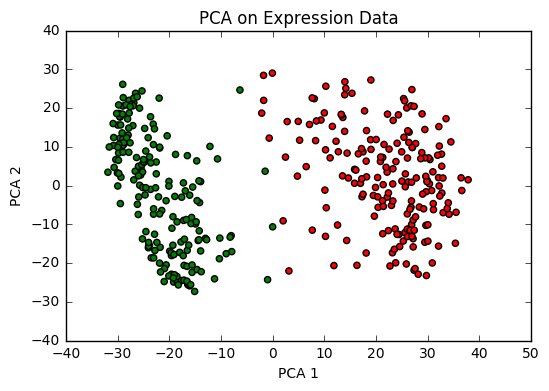

(array([   14,   184,   188,   247,   263,   362,   401,   411,   441,
          492,   526,   532,   787,   887,   907,   916,   988,   996,
         1034,  1279,  1299,  1329,  1378,  1447,  1458,  1461,  1489,
         1526,  1532,  1577,  1817,  1827,  1925,  1960,  1970,  1994,
         2041,  2044,  2190,  2195,  2254,  2266,  2280,  2288,  2299,
         2438,  2548,  2559,  2618,  2709,  2769,  2792,  3010,  3078,
         3080,  3098,  3229,  3295,  3475,  3524,  3564,  3585,  3606,
         3764,  3790,  3813,  3951,  3983,  4028,  4136,  4150,  4151,
         4226,  4255,  4345,  4518,  4565,  4626,  4637,  4658,  4678,
         4682,  4716,  4736,  4758,  4836,  5152,  5236,  5291,  5346,
         5396,  5431,  5463,  5483,  5516,  5606,  5628,  5726,  5770,
         5793,  5818,  5889,  5941,  6028,  6029,  6053,  6071,  6122,
         6130,  6207,  6258,  6311,  6368,  6396,  6414,  6471,  6485,
         6510,  6546,  6666,  6667,  6714,  6733,  6736,  6765,  6769,
      

In [44]:
methyl_PCA = PCA()
results = methyl_PCA.fit_transform(data_wo_na)
clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(results)

colors = {0: "r", 1: "g"}
p = plt.scatter(results[:, 0], results[:, 1], c=[colors[c] for c in cluster_labels])
plt.title("PCA on Expression Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

data.shape
na_inds

In [8]:
def significantSites(iter, sampleSites=None):
    significantSites = identify_significant_cpgSites(sampleNames=sampleSites)
    f = open("SignificantCpG_Variances_iter"+str(iter), 'w')
    for site in significantSites:
        f.write(site + "\n")
    f.close()

In [9]:
## run this then below
numTraining = int(382 * 0.8)
trainingIndices = random.sample(range(382), numTraining)
testIndices = list(set(range(382)) - set(trainingIndices))
trainingNames, testNames = [sampleNames[i] for i in trainingIndices], [sampleNames[i] for i in testIndices]
cpgIndices, cpgQuoteIndices = resetCpGSites(i,trainingNames)

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:171: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:172: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:173: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:174: Par

0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexin

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: DtypeWarning: Columns (3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119,123,127,131,135,139,143,147,151,155,159,163,167,171,175,179,183,187,191,195,199,203,207,211,215,219,223,227,231,235,239,243,247,251,255,259,263,267,271,275,279,283,287,291,295,299,303,307,311,315,319,323,327,331,335,339,343,347,351,355,359,363,367,371,375,379,383,387,391,395,399,403,407,411,415,419,423,427,431,435,439,443,447,451,455,459,463,467,471,475,479,483,487,491,495,499,503,507,511,515,519,523,527,531,535,539,543,547,551,555,559,563,567,571,575,579,583,587,591,595,599,603,607,611,615,619,623,627,631,635,639,643,647,651,655,659,663,667,671,675,679,683,687,691,695,699,703,707,711,715,719,723,727,731,735,739,743,747,751,755,759,763,767,771,775) have mixed types. Specify dtype option on import or set low_memory=False.


46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


In [9]:
data, labels, sampleNames = importData(cpgIndices,cpgQuoteIndices)
print("Done importing data")
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 1  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 1  1
Control 1  2
Control 1  3
Control 1  4
Control 1  5
Control 1  6
Control 1  7
Control 1  8
Control 1  9
Control 1  10
Control 1  11
Control 1  12
Control 1  13
Control 1  14
Control 1  15
Control 1  16
Control 1  17
Control 1  18
Control 1  19
Control 1  20
Control 1  21
Control 1  22
Control 1  23
Control 1  24
Control 1  25
Control 1  26
Control 1  27
Control 1  28
Control 1  29
Control 1  30
Control 1  31
Control 1  32
Control 1  33
Control 1  34
Control 1  35
Control 1  36
Control 1  37
Control 1  38
Control 1  39
Control 1  40
Control 1  41
Control 1  42
Control 1  43
Control 1  44
Control 1  45
Control 1  46
Control 1  47
Control 1  48
Control 1  49
Control 1  50
Control 1  51
Control 1  52
Control 1  53
Control 1  54
Control 1  55
Control 1  56
Control 1  57
Control 1  58
Control 1  59
Control 1  60
Control 1  61
Control 1  62
Control 1  63
Control 1  64
Control 1  65
Control 1  66
Control 1  67
Control 1  68
Control 1  69
Control 1  70
Control 1  71
Control 1  72
C

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:68: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 2 0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 2 1
Control 2 2
Control 2 3
Control 2 4
Control 2 5
Control 2 6
Control 2 7
Control 2 8
Control 2 9
Control 2 10
Control 2 11
Control 2 12
Control 2 13
Control 2 14
Control 2 15
Control 2 16
Control 2 17
Control 2 18
Control 2 19
Control 2 20
Control 2 21
Control 2 22
Control 2 23
Control 2 24
Control 2 25
Control 2 26
Control 2 27
Control 2 28
Control 2 29
Control 2 30
Control 2 31
Control 2 32
Control 2 33
Control 2 34
Control 2 35
Control 2 36
Control 2 37
Control 2 38
Control 2 39
Control 2 40
Control 2 41
Control 2 42
Control 2 43
Control 2 44
Control 2 45
Control 2 46
Control 2 47
Control 2 48
Control 2 49
Control 2 50
Control 2 51
Control 2 52
Control 2 53
Control 2 54
Control 2 55
Control 2 56
Control 2 57
Control 2 58
Control 2 59
Control 2 60
Control 2 61
Control 2 62
Control 2 63
Control 2 64
Control 2 65
Control 2 66
Control 2 67
Control 2 68
Control 2 69
Control 2 70
Control 2 71
Control 2 72
Control 2 73
Control 2 74
Control 2 75
Control 2 76
Control 2 77
Control 

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:84: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 3  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Control 3  1
Control 3  2
Control 3  3
Control 3  4
Control 3  5
Control 3  6
Control 3  7
Control 3  8
Control 3  9
Control 3  10
Control 3  11
Control 3  12
Control 3  13
Control 3  14
Control 3  15
Control 3  16
Control 3  17
Control 3  18
Control 3  19
Control 3  20
Control 3  21
Control 3  22
Control 3  23
Control 3  24
Control 3  25
Control 3  26
Control 3  27
Control 3  28
Control 3  29
Control 3  30
Control 3  31
Control 3  32
Control 3  33
Control 3  34
Control 3  35
Control 3  36
Control 3  37
Control 3  38
Control 3  39
Control 3  40
Control 3  41
Control 3  42
Control 3  43
Control 3  44
Control 3  45
Control 3  46
Control 3  47
Control 3  48
Control 3  49
Control 3  50
Control 3  51
Control 3  52
Control 3  53
Control 3  54
Control 3  55
Control 3  56
Control 3  57
Control 3  58
Control 3  59
Control 3  60
Control 3  61
Control 3  62
Control 3  63
Control 3  64
Control 3  65
Control 3  66
Control 3  67
Control 3  68
Control 3  69
Control 3  70
Control 3  71
Control 3  72
C

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:100: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 4  0
Control 4  1
Control 4  2
Control 4  3
Control 4  4
Control 4  5
Control 4  6
Control 4  7
Control 4  8
Control 4  9
Control 4  10
Control 4  11
Control 4  12
Control 4  13
Control 4  14
Control 4  15
Control 4  16
Control 4  17
Control 4  18
Control 4  19
Control 4  20
Control 4  21
Control 4  22
Control 4  23
Control 4  24
Control 4  25
Control 4  26
Control 4  27
Control 4  28
Control 4  29
Control 4  30
Control 4  31
Control 4  32
Control 4  33
Control 4  34
Control 4  35
Control 4  36
Control 4  37
Control 4  38
Control 4  39
Control 4  40
Control 4  41
Control 4  42
Control 4  43
Control 4  44
Control 4  45
Control 4  46
Control 4  47
Control 4  48
Control 4  49
Control 4  50
Control 4  51
Control 4  52
Control 4  53
Control 4  54
Control 4  55
Control 4  56
Control 4  57
Control 4  58
Control 4  59
Control 4  60
Control 4  61
Control 4  62
Control 4  63
Control 4  64
Control 4  65
Control 4  66
Control 4  67
Control 4  68
Control 4  69
Control 4  70
Control 4  71
Co

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:116: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Control 5  0
Control 5  1
Control 5  2
Control 5  3
Control 5  4
Control 5  5
Control 5  6
Control 5  7
Control 5  8
Control 5  9
Control 5  10
Control 5  11
Control 5  12
Control 5  13
Control 5  14
Control 5  15
Control 5  16
Control 5  17
Control 5  18
Control 5  19
Control 5  20
Control 5  21
Control 5  22
Control 5  23
Control 5  24
Control 5  25
Control 5  26
Control 5  27
Control 5  28
Control 5  29
Control 5  30
Control 5  31
Control 5  32
Control 5  33
Control 5  34
Control 5  35
Control 5  36
Control 5  37
Control 5  38
Control 5  39
Control 5  40
Control 5  41
Control 5  42
Control 5  43
Control 5  44
Control 5  45
Control 5  46
Control 5  47
Control 5  48
Control 5  49
Control 5  50
Control 5  51
Control 5  52
Control 5  53
Control 5  54
Control 5  55
Control 5  56
Control 5  57
Control 5  58
Control 5  59
Control 5  60
Control 5  61
Control 5  62
Control 5  63
Control 5  64
Control 5  65
Control 5  66
Control 5  67
Control 5  68
Control 5  69
Control 5  70
Control 5  71
Co

C:\Users\chsue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (1,4,5,8,9,12,13,16,17,20,21,24,25,28,29,32,33,36,37,40,41,44,45,48,49,52,53,56,57,60,61,64,65,68,69,72,73,76,77,80,81,84,85,88,89,92,93,96,97,100,101,104,105,108,109,112,113,116,117,120,121,124,125,128,129,132,133,136,137,140,141,144,145,148,149,152,153,156,157,160,161,164,165,168,169,172,173,176,177,180,181,184,185,188,189,192,193,196,197,200,201,204,205,208,209,212,213,216,217,220,221,224,225,228,229,232,233,236,237,240,241,244,245,248,249,252,253,256,257,260,261,264,265,268,269,272,273,276,277,280,281,284,285,288,289,292,293,296,297,300,301,304,305,308,309,312,313,316,317,320,321,324,325,328,329,332,333,336,337,340,341,344,345,348,349,352,353,356,357,360,361,364,365,368,369,372,373,376,377,380,381,384,385,388,389,392,393,396,397,400,401,404,405,408,409,412,413,416,417,420,421,424,425,428,429,432,433,436,437,440,441,444,445,448,449,452,453,456,457,460,461,464,465,468,469,472,473,4

Cancer  0


C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Cancer  1
Cancer  2
Cancer  3
Cancer  4
Cancer  5
Cancer  6
Cancer  7
Cancer  8
Cancer  9
Cancer  10
Cancer  11
Cancer  12
Cancer  13
Cancer  14
Cancer  15
Cancer  16
Cancer  17
Cancer  18
Cancer  19
Cancer  20
Cancer  21
Cancer  22
Cancer  23
Cancer  24
Cancer  25
Cancer  26
Cancer  27
Cancer  28
Cancer  29
Cancer  30
Cancer  31
Cancer  32
Cancer  33
Cancer  34
Cancer  35
Cancer  36
Cancer  37
Cancer  38
Cancer  39
Cancer  40
Cancer  41
Cancer  42
Cancer  43
Cancer  44
Cancer  45


C:\Users\chsue\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3,7,11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87,91,95,99,103,107,111,115,119,123,127,131,135,139,143,147,151,155,159,163,167,171,175,179,183,187,191,195,199,203,207,211,215,219,223,227,231,235,239,243,247,251,255,259,263,267,271,275,279,283,287,291,295,299,303,307,311,315,319,323,327,331,335,339,343,347,351,355,359,363,367,371,375,379,383,387,391,395,399,403,407,411,415,419,423,427,431,435,439,443,447,451,455,459,463,467,471,475,479,483,487,491,495,499,503,507,511,515,519,523,527,531,535,539,543,547,551,555,559,563,567,571,575,579,583,587,591,595,599,603,607,611,615,619,623,627,631,635,639,643,647,651,655,659,663,667,671,675,679,683,687,691,695,699,703,707,711,715,719,723,727,731,735,739,743,747,751,755,759,763,767,771,775) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Cancer  46
Cancer  47
Cancer  48
Cancer  49
Cancer  50
Cancer  51
Cancer  52
Cancer  53
Cancer  54
Cancer  55
Cancer  56
Cancer  57
Cancer  58
Cancer  59
Cancer  60
Cancer  61
Cancer  62
Cancer  63
Cancer  64
Cancer  65
Cancer  66
Cancer  67
Cancer  68
Cancer  69
Cancer  70
Cancer  71
Cancer  72
Cancer  73
Cancer  74
Cancer  75
Cancer  76
Cancer  77
Cancer  78
Cancer  79
Cancer  80
Cancer  81
Cancer  82
Cancer  83
Cancer  84
Cancer  85
Cancer  86
Cancer  87
Cancer  88
Cancer  89
Cancer  90
Cancer  91
Cancer  92
Cancer  93
Cancer  94
Cancer  95
Cancer  96
Cancer  97
Cancer  98
Cancer  99
Cancer  100
Cancer  101
Cancer  102
Cancer  103
Cancer  104
Cancer  105
Cancer  106
Cancer  107


C:\Users\chsue\AppData\Roaming\Python\Python35\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


                              Cancer  Not Cancer  cg00001261  cg00001510  \
1B                                 0           1         0.0         1.0   
2A                                 0           1         0.0         0.0   
3B                                 0           1         1.0         1.0   
3                                  0           1         0.0         1.0   
5                                  0           1         0.0         1.0   
13                                 0           1         0.0         1.0   
19                                 0           1         0.0         1.0   
10                                 0           1         0.0         1.0   
12                                 0           1         1.0         1.0   
14                                 0           1         0.0         0.0   
2                                  0           1         0.0         1.0   
239                                0           1         0.0         1.0   
200         

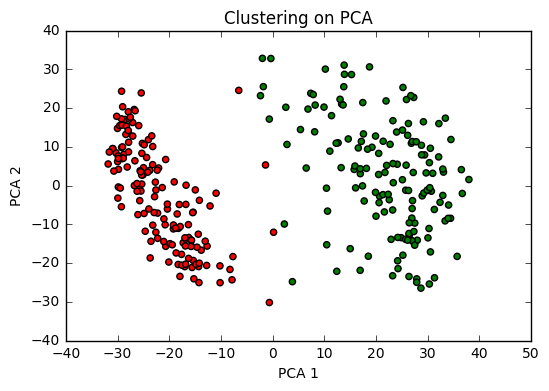

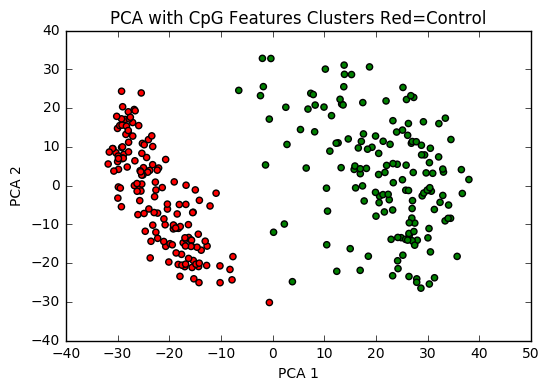

[244,
 232,
 309,
 177,
 20,
 62,
 154,
 96,
 27,
 241,
 136,
 131,
 68,
 166,
 129,
 341,
 49,
 25,
 256,
 322,
 151,
 310,
 173,
 142,
 22,
 374,
 365,
 296,
 181,
 231,
 86,
 221,
 80,
 190,
 18,
 168,
 325,
 124,
 272,
 236,
 268,
 161,
 186,
 197,
 73,
 152,
 110,
 101,
 273,
 29,
 243,
 271,
 220,
 291,
 200,
 209,
 298,
 363,
 265,
 158,
 41,
 257,
 215,
 94,
 368,
 116,
 344,
 263,
 323,
 76,
 294,
 315,
 277,
 69,
 375,
 156,
 176,
 297,
 219,
 67,
 162,
 63,
 138,
 3,
 184,
 60,
 78,
 147,
 312,
 381,
 203,
 319,
 278,
 254,
 107,
 332,
 284,
 336,
 46,
 326,
 83,
 345,
 0,
 366,
 370,
 54,
 360,
 337,
 14,
 115,
 84,
 35,
 89,
 24,
 175,
 5,
 274,
 362,
 302,
 308,
 57,
 250,
 139,
 346,
 37,
 188,
 21,
 95,
 267,
 247,
 143,
 157,
 248,
 214,
 38,
 359,
 91,
 303,
 255,
 99,
 269,
 196,
 82,
 252,
 134,
 64,
 304,
 13,
 141,
 292,
 358,
 264,
 52,
 313,
 223,
 230,
 286,
 276,
 259,
 371,
 71,
 19,
 114,
 279,
 262,
 70,
 15,
 126,
 11,
 377,
 373,
 324,
 228,
 66,
 140,
 2

In [50]:
boolean_mask =np.isnan(data).any(axis=0)
na_inds = np.where(boolean_mask==True)
data_wo_na = np.delete(data.values,na_inds,axis=1)
methyl_PCA = PCA()
results = methyl_PCA.fit_transform(data_wo_na[trainingIndices])
clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(results)

colors = {0: "r", 1: "g"}
p = plt.scatter(results[:, 0], results[:, 1], c=[colors[c] for c in cluster_labels])
plt.title("Clustering on PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# colors_label = [0] * 190 + [1] * (len(cluster_labels) - 190)
colors_label = [0 if labels[i][0] == 0 else 1 for i in trainingIndices]
p1 = plt.scatter(results[:, 0], results[:, 1], c=[colors[c] for c in colors_label])
plt.title("PCA with CpG Features Clusters Red=Control")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

trainingIndices

In [49]:
data_wo_na[trainingIndices].shape

(305, 10600)

In [1]:
X_train,X_test = data_wo_na[trainingIndices], data_wo_na[testIndices]
Y_train, Y_test = labels[trainingIndices], labels[testIndices]
# model = create_nn_model(X_train.shape[1])
# model.fit(X_train,Y_train,batch_size=32,epochs=3)
# score = model.evaluate(X_test, Y_test, batch_size=32)
# print(X_train.shape)
# print("Score: ", score)

model = create_svm()
Y_train = Y_train[:,0]
Y_test = Y_test[:,0]
model.fit(X_train,Y_train)
y_score = model.predict_proba(X_test)
print(model.score(X_test,Y_test))
from sklearn.externals import joblib

_ = joblib.dump(model, "SVM_10kvar.joblib.pkl",compress=9)

NameError: name 'data_wo_na' is not defined

In [22]:
    fpr, tpr, thresholds = roc_curve(Y_test, score[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    plt.show()

TypeError: list indices must be integers or slices, not tuple

In [55]:
## hoping to god it generalizes and is ok on this dataset here
f = open("SignificantCpG_Variances_iter0",'r')
# g = open("naIndices.txt",'r')
# test_na_inds=g.split(", ") ##idk havent done this yet
testCpgSites = f.read()
testCpgSites = testCpgSites.split("\n")
testCpgQuoteIndices = pd.Index([cpg for cpg in testCpgSites[:-1]])
from keras.models import load_model
loaded_model = load_model("twoLayerNN_10kvar.h5")
testLeukemiaData = importTestCancer(testCpgQuoteIndices).values
testControlData = importTestControl(testCpgQuoteIndices).values
testLeukemiaData = np.delete(testLeukemiaData,na_inds,axis=1)
testControlData = np.delete(testControlData,na_inds,axis=1)
print(testLeukemiaData,testControlData)
print(np.isnan(testControlData).any(axis=0))

np.nan_to_num(testLeukemiaData, copy=False)
np.nan_to_num(testControlData, copy=False)
print(testLeukemiaData,testControlData)
print(np.isnan(testControlData).any(axis=0))

output = loaded_model.predict(testLeukemiaData)
print("Cancer",output)
output = loaded_model.predict(testControlData)
print("Control",output)

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:132: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Test cancer  0
Test cancer  1
Test cancer  2
Test cancer  3
Test cancer  4
Test cancer  5
Test cancer  6
Test cancer  7
Test cancer  8
Test cancer  9
Test cancer  10
Test cancer  11
Test cancer  12
Test cancer  13
Test cancer  14
Test cancer  15
Test cancer  16
Test cancer  17
Test cancer  18
Test cancer  19
Test cancer  20
Test cancer  21
Test cancer  22
Test cancer  23
Test cancer  24
Test cancer  25
Test cancer  26
Test cancer  27
Test cancer  28
Test cancer  29
Test cancer  30
Test cancer  31
Test cancer  32
Test cancer  33
Test cancer  34
Test cancer  35
Test cancer  36
Test cancer  37
Test cancer  38
Test cancer  39
Test cancer  40
Test cancer  41
Test cancer  42
Test cancer  43
Test cancer  44
Test cancer  45
Test cancer  46
Test cancer  47
Test cancer  48
Test cancer  49
Test cancer  50
Test cancer  51
Test cancer  52
Test cancer  53
Test cancer  54
Test cancer  55
Test cancer  56
Test cancer  57
Test cancer  58
Test cancer  59
Test cancer  60
Test cancer  61
Test cancer  62
Te

C:\Users\chsue\Anaconda3\lib\site-packages\ipykernel\__main__.py:145: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


Test control  0
Test control  1
Test control  2
Test control  3
Test control  4
Test control  5
Test control  6
Test control  7
Test control  8
Test control  9
Test control  10
Test control  11
Test control  12
Test control  13
Test control  14
Test control  15
Test control  16
Test control  17
Test control  18
Test control  19
Test control  20
Test control  21
Test control  22
Test control  23
Test control  24
Test control  25
Test control  26
Test control  27
Test control  28
Test control  29
Test control  30
Test control  31
Test control  32
Test control  33
Test control  34
Test control  35
Test control  36
Test control  37
Test control  38
Test control  39
Test control  40
Test control  41
Test control  42
Test control  43
Test control  44
Test control  45
Test control  46
Test control  47
Test control  48
Test control  49
Test control  50
Test control  51
Test control  52
Test control  53
Test control  54
Test control  55
Test control  56
Test control  57
Test control  58
Test co

In [54]:
print(methyl_PCA.transform(testLeukemiaData)[:,0])
print(methyl_PCA.transform(testControlData)[:,0])

[ 0.82918375 13.66087947 19.29977638 19.15453949 18.80167778  1.39848098]
[ -6.8561941   -3.6192174   -5.7221994   -9.51067851 -13.83938042
 -10.76377373  -8.48317013 -10.97650407  -9.25608738 -11.45375144
 -11.27697142  -9.72981188  -7.1744014  -12.30682436  -8.28867793
 -13.08759061 -10.39681739 -13.890313   -13.17427566 -15.4393725
 -13.20224391 -14.61197464 -11.35695142 -11.21100295 -12.10510401
 -12.17862205 -11.10630536 -12.42893992  -4.05651368 -12.66969313
  -5.62054728 -10.13854464 -13.0292037  -12.69799028 -14.81490631
 -10.53236353 -12.88792927 -11.26788512 -12.78972801 -10.88281333
 -13.93449809 -13.05476707 -14.35587913 -12.35820253 -12.9802676
  -3.85022913  -8.84918823 -13.11677977 -12.74753333 -10.13774994
 -10.05331137 -15.03426689 -11.75832587 -13.21889727  -9.14181659
  -8.29160138 -12.28375431 -10.77692079  -7.15636487  -0.03413887
  -6.25057786 -16.03023052  -9.41675914 -12.21714959  -7.76556657
 -13.35752392 -10.88628599 -12.01971748  -8.35424327 -10.94961477
  -9

In [58]:
from sklearn.externals import joblib
clf2 = joblib.load("SVM_10kvar.joblib.pkl")
clf2.predict(testControlData)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)